## First experiment

In [27]:
# Read in data
data = pd.read_csv('EXP1_RT.csv'.format(projectName), sep=';', decimal=b',')
data.head()

,present-HL,present-LL,absent,AnyOnHighP-HL,AnyOnHighP-LL,AnyOnlowP,highP-HL,highPOther-HL,lowP-HL,highP-LL,...,Distance3-LL,Distance4-LL,highP-HL-swap,highPOther-HL-swap,lowP-HL-swap,highP-LL-swap,highPOther-LL-swap,lowP-LL-swap,swap,same
0,724.196545,734.735269,707.685006,712.456853,731.223281,744.644495,712.380055,728.144733,749.989480,734.301829,...,733.695517,712.533651,719.576828,733.015826,752.560298,742.878974,709.128014,740.122349,716.287372,737.317706
1,775.344163,762.414334,754.178723,732.254049,781.080696,792.176752,754.183235,797.741782,817.383364,764.419609,...,767.224414,710.324864,751.210447,789.631005,815.058499,765.071134,704.961505,768.562417,762.104345,772.841742
2,906.895059,892.869786,872.451897,888.201191,933.030547,908.750504,890.101211,969.011686,932.702031,897.049408,...,863.245569,886.301171,908.451846,964.450094,930.948941,897.932836,887.436658,885.624043,886.956639,907.022899
3,706.175530,676.801056,663.344963,686.018181,698.781434,704.592803,697.198372,724.926377,723.016131,672.636490,...,689.600935,674.837991,704.621712,730.526062,724.007122,680.997978,674.837991,688.959952,677.884373,699.622521
4,885.832759,868.607076,842.517722,867.819508,878.555456,909.291290,861.020115,893.291516,940.118230,863.819397,...,907.019292,874.618902,867.158519,890.586997,940.407051,864.900190,874.618902,882.905466,860.007241,887.656504


In [28]:
# Get keys
data.keys()

Index(['present-HL', 'present-LL', 'absent', 'AnyOnHighP-HL', 'AnyOnHighP-LL',
       'AnyOnlowP', 'highP-HL', 'highPOther-HL', 'lowP-HL', 'highP-LL',
       'highPOther-LL', 'lowP-LL', 'Distance0-HL', 'Distance1-HL',
       'Distance2-HL', 'Distance3-HL', 'Distance4-HL', 'Distance0-LL',
       'Distance1-LL', 'Distance2-LL', 'Distance3-LL', 'Distance4-LL',
       'highP-HL-swap', 'highPOther-HL-swap', 'lowP-HL-swap', 'highP-LL-swap',
       'highPOther-LL-swap', 'lowP-LL-swap', 'swap', 'same'],
      dtype='object')

In [29]:
# Start with the analysis for any distractor on each location of interest
column_labels = [['high prob. high salience distractor', 'high prob. low salience distractor','low prob.', 'absent']]
columns = pd.MultiIndex.from_product(column_labels,
                                     names=['Distractor position'])
index = pd.MultiIndex.from_product([np.arange(len(data))+1], names=['subject number'])
disLoc = pd.DataFrame(data.values[:,[3,4,5,2]], index=index, columns=columns)
disLoc.head()

Distractor position,high prob. high salience distractor,high prob. low salience distractor,low prob.,absent
subject number,,,,
1,712.456853,731.223281,744.644495,707.685006
2,732.254049,781.080696,792.176752,754.178723
3,888.201191,933.030547,908.750504,872.451897
4,686.018181,698.781434,704.592803,663.344963
5,867.819508,878.555456,909.291290,842.517722


In [30]:
# Now, the analysis for a given distractor on each location of interest
column_labels = [['high probability high salience', 'high probability low salience', 'low probability'],
                ['high salience distractor', 'low salience distractor']]
columns = pd.MultiIndex.from_product(column_labels,
                                     names=['Distractor position', 'Distractor salience'])
index = pd.MultiIndex.from_product([np.arange(len(data))+1], names=['subject number'])
disLocEach = pd.DataFrame(data.values[:,[6, 10, 7, 9, 8, 11]], index=index, columns=columns)
disLocEach.head()

Distractor position high probability high salience                          \
Distractor salience       high salience distractor low salience distractor   
subject number                                                               
1                                       712.380055              712.533651   
2                                       754.183235              710.324864   
3                                       890.101211              886.301171   
4                                       697.198372              674.837991   
5                                       861.020115              874.618902   

Distractor position high probability low salience                          \
Distractor salience      high salience distractor low salience distractor   
subject number                                                              
1                                      728.144733              734.301829   
2                                      797.741782              764.419609   
3                                      969.011686              897.049408   
4                                      724.926377              672.636490   
5                                      893.291516              863.819397   

Distractor position          low probability                          
Distractor salience high salience distractor low salience distractor  
subject number                                                        
1                                 749.989480              739.299509  
2                                 817.383364              766.970139  
3                                 932.702031              884.798977  
4                                 723.016131              686.169476  
5                                 940.118230              878.464350

In [31]:
disLocEach['absent']=data.values[:,2]
disLocEach.head()

Distractor position high probability high salience                          \
Distractor salience       high salience distractor low salience distractor   
subject number                                                               
1                                       712.380055              712.533651   
2                                       754.183235              710.324864   
3                                       890.101211              886.301171   
4                                       697.198372              674.837991   
5                                       861.020115              874.618902   

Distractor position high probability low salience                          \
Distractor salience      high salience distractor low salience distractor   
subject number                                                              
1                                      728.144733              734.301829   
2                                      797.741782              764.419609   
3                                      969.011686              897.049408   
4                                      724.926377              672.636490   
5                                      893.291516              863.819397   

Distractor position          low probability                          \
Distractor salience high salience distractor low salience distractor   
subject number                                                         
1                                 749.989480              739.299509   
2                                 817.383364              766.970139   
3                                 932.702031              884.798977   
4                                 723.016131              686.169476   
5                                 940.118230              878.464350   

Distractor position      absent  
Distractor salience              
subject number                   
1                    707.685006  
2                    754.178723  
3                    872.451897  
4                    663.344963  
5                    842.517722

In [32]:
# Looks good! Let's plot it now.
# First, we calculate the CIs
withinCIsFig1 = confidence_int(disLoc.values)
withinCIsFig2 = confidence_int(disLocEach.values)
# Then, we flatten the multidimensional data
disLocEach = pd.melt( disLocEach.reset_index(),id_vars="subject number", value_name="Response time (ms)")
disLocEach.head()

,subject number,Distractor position,Distractor salience,Response time (ms)
0,1,high probability high salience,high salience distractor,712.380055
1,2,high probability high salience,high salience distractor,754.183235
2,3,high probability high salience,high salience distractor,890.101211
3,4,high probability high salience,high salience distractor,697.198372
4,5,high probability high salience,high salience distractor,861.020115


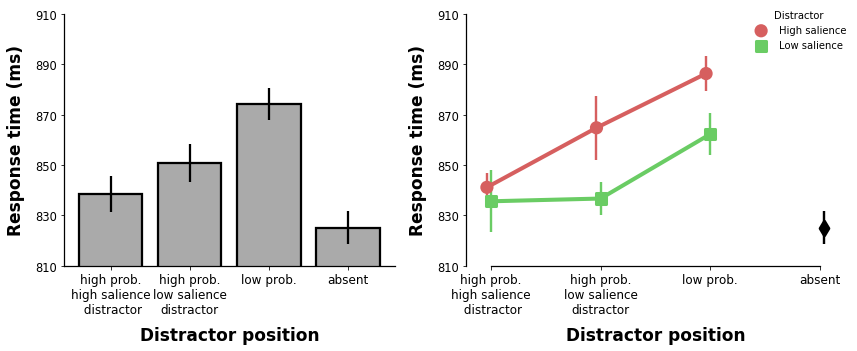

In [33]:
column_labels = ['high prob.\nhigh salience\n distractor', 'high prob.\nlow salience\ndistractor', 
                     'low prob.', 'absent']

fig, ax = plt.subplots(1,2, figsize=(12,5), 
                       subplot_kw=dict(ylim=(810,910)),
                       gridspec_kw={'width_ratios':[1,1.15]})

for i in range(2):
    if i==0:
        sns.barplot(data=disLoc, ax=ax[i], color='#AAAAAA', edgecolor='black', linewidth=2.25, ci=None)
        ax[i].errorbar(y=disLoc.mean(axis=0).values, x=np.arange(4), yerr=withinCIsFig1,
                       color='black', fmt=' ', elinewidth=2.25)
        ax[i].set_yticks(np.arange(810,911,20))
        ax[i].set_yticklabels(np.arange(810,911, 20), fontsize=11.5)
        sns.despine(ax=ax[i], trim=False)
    elif i==1:
        sns.pointplot(x="Distractor position", y="Response time (ms)", hue="Distractor salience",
               ci=None, units="Response time (ms)", data=disLocEach, ax=ax[i], scale=1.5, dodge=True,
                      join=True, palette=['#d65f5f','#6acc64','black','#4878d0','#ee854a'], 
                      linestyles=["-", "-",'-'], markers=['o', 's', 'd'])
        # Find the x,y coordinates for each point
        x_coords, y_coords = [],[]
        for point_pair in ax[i].collections:
            for x, y in point_pair.get_offsets():
                x_coords.append(x)
                y_coords.append(y)
        colors = ['#d65f5f']*3 + ['#6acc64']*3 + ['black']
        ax[i].errorbar(x_coords, y_coords, yerr=withinCIsFig2[np.array([0,2,4,1,3,5,6])], 
                       ecolor=colors, fmt=' ', zorder=-1, elinewidth=2.4)
        leg_handles = ax[i].get_legend_handles_labels()[0]
        ax[i].legend(leg_handles, ['High salience', 'Low salience'], bbox_to_anchor=(1.025, 1.05),
                     title='Distractor', frameon=False)
        ax[i].set_yticks(np.arange(810,911,20))
        ax[i].set_yticklabels(np.arange(810,911, 20), fontsize=11.5)
        sns.despine(ax=ax[i], trim=True)
    ax[i].set_xticklabels(column_labels, fontsize=12)
    ax[i].set_ylabel('Response time (ms)',fontsize=17, labelpad=10, fontweight='bold')
    ax[i].set_xlabel('Distractor position',fontsize=17, labelpad=10, fontweight='bold')
    for axis in ['bottom','left']:
        ax[i].spines[axis].set_linewidth(1.25)
plt.tight_layout()
plt.savefig(path_figures+'/figure2.pdf', dpi=1000)
plt.savefig(path_figures+'/figure2.svg', dpi=1000)

In [34]:
# Now the gradient analysis
column_labels = [['high salience distractor', 'low salience distractor'],
                 ['high prob. salience match', 'distance 1', 'distance 2','distance 3','high prob. salience mismatch']]
columns = pd.MultiIndex.from_product(column_labels,
                                     names=['Distractor salience', 'Distractor position'])
index = pd.MultiIndex.from_product([np.arange(len(data))+1], names=['subject number'])
disLocGrad = pd.DataFrame(data.values[:,12:22], index=index, columns=columns)
disLocGrad.head()

Distractor salience  high salience distractor                          \
Distractor position high prob. salience match  distance 1  distance 2   
subject number                                                          
1                                  712.380055  746.690741  771.980256   
2                                  754.183235  811.178135  796.293836   
3                                  890.101211  914.509072  941.315125   
4                                  697.198372  730.689652  704.610472   
5                                  861.020115  943.276927  944.224259   

Distractor salience                                           \
Distractor position  distance 3 high prob. salience mismatch   
subject number                                                 
1                    731.107403                   728.144733   
2                    846.312800                   797.741782   
3                    942.971071                   969.011686   
4                    733.696992                   724.926377   
5                    932.672358                   893.291516   

Distractor salience   low salience distractor                          \
Distractor position high prob. salience match  distance 1  distance 2   
subject number                                                          
1                                  734.301829  754.505944  729.166962   
2                                  764.419609  777.066175  756.391553   
3                                  897.049408  906.058363  884.852636   
4                                  672.636490  694.619802  674.450598   
5                                  863.819397  883.131086  845.650601   

Distractor salience                                           
Distractor position  distance 3 high prob. salience mismatch  
subject number                                                
1                    733.695517                   712.533651  
2                    767.224414                   710.324864  
3                    863.245569                   886.301171  
4                    689.600935                   674.837991  
5                    907.019292                   874.618902

In [35]:
# Looks good! Let's plot it now.
# First, we calculate the CIs
withinCIsFig3 = confidence_int(disLocGrad.values)
# Then, we flatten the multidimensional data
disLocGrad = pd.melt( disLocGrad.reset_index(),id_vars="subject number", value_name="Response time (ms)")
disLocGrad.head()
# We plot this later...

,subject number,Distractor salience,Distractor position,Response time (ms)
0,1,high salience distractor,high prob. salience match,712.380055
1,2,high salience distractor,high prob. salience match,754.183235
2,3,high salience distractor,high prob. salience match,890.101211
3,4,high salience distractor,high prob. salience match,697.198372
4,5,high salience distractor,high prob. salience match,861.020115


## Second experiment

In [38]:
# Read in data
data = pd.read_csv('EXP2_RT.csv'.format(projectName), sep=';', decimal=b',')
data.head()

,present-HL,present-LL,absent,AnyOnHighP-HL,AnyOnHighP-LL,AnyOnlowP,highP-HL,highPOther-HL,lowP-HL,highP-LL,...,Distance3-LL,Distance4-LL,highP-HL-swap,highPOther-HL-swap,lowP-HL-swap,highP-LL-swap,highPOther-LL-swap,lowP-LL-swap,swap,same
0,902.501178,903.842105,888.509520,883.251471,906.447300,910.470656,898.085754,908.953247,911.006782,903.941353,...,904.529376,868.417188,901.427867,910.815927,914.246333,901.707869,874.255780,909.964868,898.907872,905.607976
1,644.792634,634.461813,613.187887,626.608536,631.016020,675.460466,625.086246,638.712805,690.283450,623.319234,...,691.818540,628.130827,637.668127,642.375182,692.616179,636.479318,630.223009,656.972628,615.013446,653.592768
2,617.260113,617.046473,615.713722,614.434199,613.112039,629.567788,608.643340,611.815357,636.985070,614.408722,...,613.216546,620.225059,609.454547,613.831408,638.797449,616.818727,616.327676,619.103018,611.370524,620.615264
3,815.235313,828.698783,803.899497,802.533412,840.436929,841.084863,795.916730,851.552072,851.441743,829.321786,...,859.797187,809.150095,807.313836,844.412147,852.455992,820.631197,816.840248,832.732368,810.619728,828.318904
4,887.015071,849.731869,820.832973,872.332972,878.604129,890.052062,873.133619,917.033359,912.548993,840.174899,...,873.107984,871.532324,878.715597,912.993050,914.100443,852.605406,875.082231,863.307761,851.698030,877.577458


In [39]:
# Get keys
data.keys()

Index(['present-HL', 'present-LL', 'absent', 'AnyOnHighP-HL', 'AnyOnHighP-LL',
       'AnyOnlowP', 'highP-HL', 'highPOther-HL', 'lowP-HL', 'highP-LL',
       'highPOther-LL', 'lowP-LL', 'Distance0-HL', 'Distance1-HL',
       'Distance2-HL', 'Distance3-HL', 'Distance4-HL', 'Distance0-LL',
       'Distance1-LL', 'Distance2-LL', 'Distance3-LL', 'Distance4-LL',
       'highP-HL-swap', 'highPOther-HL-swap', 'lowP-HL-swap', 'highP-LL-swap',
       'highPOther-LL-swap', 'lowP-LL-swap', 'swap', 'same'],
      dtype='object')

In [40]:
# Start with the analysis for any distractor on each location of interest
column_labels = [['high prob. high salience distractor', 'high prob. low salience distractor','low prob.', 'absent']]
columns = pd.MultiIndex.from_product(column_labels,
                                     names=['Distractor position'])
index = pd.MultiIndex.from_product([np.arange(len(data))+1], names=['subject number'])
disLoc = pd.DataFrame(data.values[:,[3,4,5,2]], index=index, columns=columns)
disLoc.head()

Distractor position,high prob. high salience distractor,high prob. low salience distractor,low prob.,absent
subject number,,,,
1,883.251471,906.447300,910.470656,888.509520
2,626.608536,631.016020,675.460466,613.187887
3,614.434199,613.112039,629.567788,615.713722
4,802.533412,840.436929,841.084863,803.899497
5,872.332972,878.604129,890.052062,820.832973


In [41]:
# Now, the analysis for a given distractor on each location of interest
column_labels = [['high probability high salience', 'high probability low salience', 'low probability'],
                ['high salience distractor', 'low salience distractor']]
columns = pd.MultiIndex.from_product(column_labels,
                                     names=['Distractor position', 'Distractor salience'])
index = pd.MultiIndex.from_product([np.arange(len(data))+1], names=['subject number'])
disLocEach = pd.DataFrame(data.values[:,[6, 10, 7, 9, 8, 11]], index=index, columns=columns)
disLocEach.head()

Distractor position high probability high salience                          \
Distractor salience       high salience distractor low salience distractor   
subject number                                                               
1                                       898.085754              868.417188   
2                                       625.086246              628.130827   
3                                       608.643340              620.225059   
4                                       795.916730              809.150095   
5                                       873.133619              871.532324   

Distractor position high probability low salience                          \
Distractor salience      high salience distractor low salience distractor   
subject number                                                              
1                                      908.953247              903.941353   
2                                      638.712805              623.319234   
3                                      611.815357              614.408722   
4                                      851.552072              829.321786   
5                                      917.033359              840.174899   

Distractor position          low probability                          
Distractor salience high salience distractor low salience distractor  
subject number                                                        
1                                 911.006782              909.934529  
2                                 690.283450              660.637482  
3                                 636.985070              622.150507  
4                                 851.441743              830.727984  
5                                 912.548993              867.555131

In [42]:
disLocEach['absent']=data.values[:,2]
disLocEach.head()

Distractor position high probability high salience                          \
Distractor salience       high salience distractor low salience distractor   
subject number                                                               
1                                       898.085754              868.417188   
2                                       625.086246              628.130827   
3                                       608.643340              620.225059   
4                                       795.916730              809.150095   
5                                       873.133619              871.532324   

Distractor position high probability low salience                          \
Distractor salience      high salience distractor low salience distractor   
subject number                                                              
1                                      908.953247              903.941353   
2                                      638.712805              623.319234   
3                                      611.815357              614.408722   
4                                      851.552072              829.321786   
5                                      917.033359              840.174899   

Distractor position          low probability                          \
Distractor salience high salience distractor low salience distractor   
subject number                                                         
1                                 911.006782              909.934529   
2                                 690.283450              660.637482   
3                                 636.985070              622.150507   
4                                 851.441743              830.727984   
5                                 912.548993              867.555131   

Distractor position      absent  
Distractor salience              
subject number                   
1                    888.509520  
2                    613.187887  
3                    615.713722  
4                    803.899497  
5                    820.832973

In [43]:
# Looks good! Let's plot it now.
# First, we calculate the CIs
withinCIsFig1 = confidence_int(disLoc.values)
withinCIsFig2 = confidence_int(disLocEach.values)
# Then, we flatten the multidimensional data
disLocEach = pd.melt( disLocEach.reset_index(),id_vars="subject number", value_name="Response time (ms)")
disLocEach.head()

,subject number,Distractor position,Distractor salience,Response time (ms)
0,1,high probability high salience,high salience distractor,898.085754
1,2,high probability high salience,high salience distractor,625.086246
2,3,high probability high salience,high salience distractor,608.643340
3,4,high probability high salience,high salience distractor,795.916730
4,5,high probability high salience,high salience distractor,873.133619


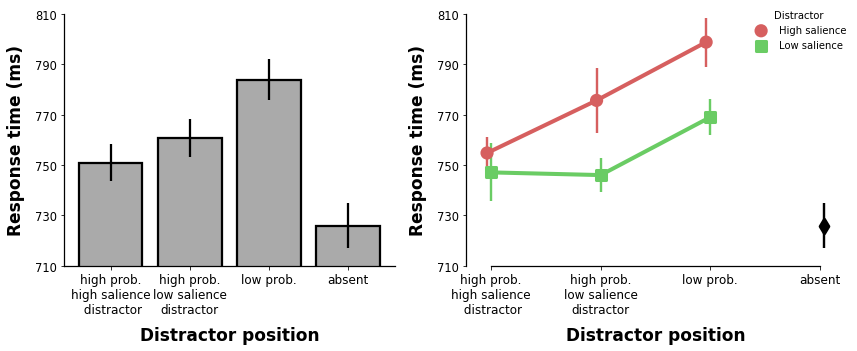

In [44]:
column_labels = ['high prob.\nhigh salience\n distractor', 'high prob.\nlow salience\ndistractor', 
                     'low prob.', 'absent']

fig, ax = plt.subplots(1,2, figsize=(12,5), 
                       subplot_kw=dict(ylim=(710,810)),
                       gridspec_kw={'width_ratios':[1,1.15]})

for i in range(2):
    if i==0:
        sns.barplot(data=disLoc, ci=None, color='#AAAAAA', edgecolor='black', linewidth=2.25, ax=ax[i])
        ax[i].errorbar(y=disLoc.mean(axis=0).values, x=np.arange(4), yerr=withinCIsFig1,
                       color='black', fmt=' ', elinewidth=2.25)
        ax[i].set_yticks(np.arange(710,811,20))
        ax[i].set_yticklabels(np.arange(710,811, 20), fontsize=11.5)
        sns.despine(ax=ax[i], trim=False)
    elif i==1:
        sns.pointplot(x="Distractor position", y="Response time (ms)", hue="Distractor salience",
               ci=None, units="Response time (ms)", data=disLocEach, ax=ax[i], scale=1.5, dodge=True,
                      join=True, palette=['#d65f5f','#6acc64','black','#4878d0','#ee854a'], 
                      linestyles=["-", "-",'-'], markers=['o', 's', 'd'])
        # Find the x,y coordinates for each point
        x_coords, y_coords = [],[]
        for point_pair in ax[i].collections:
            for x, y in point_pair.get_offsets():
                x_coords.append(x)
                y_coords.append(y)
        colors = ['#d65f5f']*3 + ['#6acc64']*3 + ['black']
        ax[i].errorbar(x_coords, y_coords, yerr=withinCIsFig2[np.array([0,2,4,1,3,5,6])], 
                       ecolor=colors, fmt=' ', zorder=-1, elinewidth=2.4)
        leg_handles = ax[i].get_legend_handles_labels()[0]
        ax[i].legend(leg_handles, ['High salience', 'Low salience'], bbox_to_anchor=(1.025, 1.05),
                     title='Distractor', frameon=False)
        ax[i].set_yticks(np.arange(710,811,20))
        ax[i].set_yticklabels(np.arange(710,811, 20), fontsize=11.5)
        sns.despine(ax=ax[i], trim=True)
    ax[i].set_xticklabels(column_labels, fontsize=12)
    ax[i].set_ylabel('Response time (ms)',fontsize=17, labelpad=10, fontweight='bold')
    ax[i].set_xlabel('Distractor position',fontsize=17, labelpad=10, fontweight='bold')
    for axis in ['bottom','left']:
        ax[i].spines[axis].set_linewidth(1.25)
plt.tight_layout()
plt.savefig(path_figures+'/figure3.pdf', dpi=1000)
plt.savefig(path_figures+'/figure3.svg', dpi=1000)

In [45]:
# Now the gradient analysis
column_labels = [['high salience distractor', 'low salience distractor'],
                 ['high prob. salience match', 'distance 1', 'distance 2','distance 3','high prob. salience mismatch']]
columns = pd.MultiIndex.from_product(column_labels,
                                     names=['Distractor salience', 'Distractor position'])
index = pd.MultiIndex.from_product([np.arange(len(data))+1], names=['subject number'])
disLocGrad2 = pd.DataFrame(data.values[:,12:22], index=index, columns=columns)
disLocGrad2.head()

Distractor salience  high salience distractor                          \
Distractor position high prob. salience match  distance 1  distance 2   
subject number                                                          
1                                  898.085754  868.786145  920.510745   
2                                  625.086246  682.619828  658.462112   
3                                  608.643340  637.506293  649.623276   
4                                  795.916730  827.137694  814.842685   
5                                  873.133619  940.804314  897.371605   

Distractor salience                                           \
Distractor position  distance 3 high prob. salience mismatch   
subject number                                                 
1                    942.068118                   908.953247   
2                    732.054690                   638.712805   
3                    622.936067                   611.815357   
4                    913.313113                   851.552072   
5                    898.019724                   917.033359   

Distractor salience   low salience distractor                          \
Distractor position high prob. salience match  distance 1  distance 2   
subject number                                                          
1                                  903.941353  922.785168  902.696495   
2                                  623.319234  660.922604  631.996222   
3                                  614.408722  599.135155  653.004935   
4                                  829.321786  794.542969  837.685666   
5                                  840.174899  877.331629  853.177197   

Distractor salience                                           
Distractor position  distance 3 high prob. salience mismatch  
subject number                                                
1                    904.529376                   868.417188  
2                    691.818540                   628.130827  
3                    613.216546                   620.225059  
4                    859.797187                   809.150095  
5                    873.107984                   871.532324

In [46]:
# Looks good! Let's plot it now.
# First, we calculate the CIs
withinCIsFig4 = confidence_int(disLocGrad2.values)
# Then, we flatten the multidimensional data
disLocGrad2 = pd.melt( disLocGrad2.reset_index(),id_vars="subject number", value_name="Response time (ms)")
disLocGrad2.head()

,subject number,Distractor salience,Distractor position,Response time (ms)
0,1,high salience distractor,high prob. salience match,898.085754
1,2,high salience distractor,high prob. salience match,625.086246
2,3,high salience distractor,high prob. salience match,608.643340
3,4,high salience distractor,high prob. salience match,795.916730
4,5,high salience distractor,high prob. salience match,873.133619


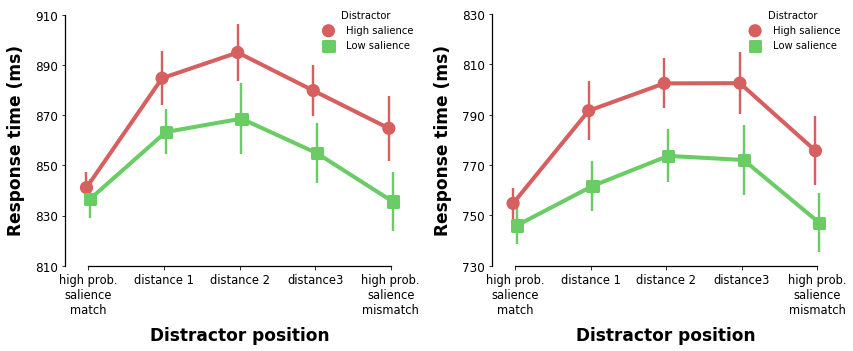

In [48]:
column_labels = ['high prob.\nsalience\nmatch', 'distance 1', 'distance 2', 'distance3',
                 'high prob.\nsalience\nmismatch']

fig, ax = plt.subplots(1,2, figsize=(12,5))
for i in range(2):
    if i==0:
        sns.pointplot(x="Distractor position", y="Response time (ms)", hue="Distractor salience",
               ci=None, units="Response time (ms)", data=disLocGrad, ax=ax[i], scale=1.5, dodge=True,
                join=True, palette=['#d65f5f','#6acc64'], markers=['o', 's'])
    elif i==1:
        sns.pointplot(x="Distractor position", y="Response time (ms)", hue="Distractor salience",
               ci=None, units="Response time (ms)", data=disLocGrad2, ax=ax[i], scale=1.5, dodge=True,
                join=True, palette=['#d65f5f','#6acc64'], markers=['o', 's'])
    # Find the x,y coordinates for each point
    x_coords, y_coords = [],[]
    for point_pair in ax[i].collections:
        for x, y in point_pair.get_offsets():
            x_coords.append(x)
            y_coords.append(y)
    colors = ['#d65f5f']*5 + ['#6acc64']*5
    if i==0:
        ax[i].errorbar(x_coords, y_coords, yerr=withinCIsFig3, 
                   ecolor=colors, fmt=' ', zorder=-1, elinewidth=2.4)
        ax[i].set_yticks(np.arange(810,911,20))
        ax[i].set_yticklabels(np.arange(810,911, 20), fontsize=12)
    elif i==1:
        ax[i].errorbar(x_coords, y_coords, yerr=withinCIsFig4, 
                   ecolor=colors, fmt=' ', zorder=-1, elinewidth=2.4)
        ax[i].set_yticks(np.arange(730,831,20))
        ax[i].set_yticklabels(np.arange(730,831, 20), fontsize=12)
    leg_handles = ax[i].get_legend_handles_labels()[0]
    ax[i].legend(leg_handles, ['High salience', 'Low salience'], bbox_to_anchor=(1.025, 1.05),
                 title='Distractor', frameon=False)
    sns.despine(ax=ax[i], trim=True)
    ax[i].set_xticklabels(column_labels, fontsize=11.5)
    ax[i].set_ylabel('Response time (ms)',fontsize=17, labelpad=10, fontweight='bold')
    ax[i].set_xlabel('Distractor position',fontsize=17, labelpad=10, fontweight='bold')
    for axis in ['bottom','left']:
        ax[i].spines[axis].set_linewidth(1.25)
plt.tight_layout()
plt.savefig(path_figures+'/figure4.pdf', dpi=1000)
plt.savefig(path_figures+'/figure4.svg', dpi=1000)